In [103]:
import pandas as pd
import numpy as np
from scipy.stats import iqr

In [104]:
# Reads in file, parses first column to datetime object, doesn't do other columns because it doesn't seem to work
expedia = pd.read_csv('expedia/train.csv', parse_dates = ['date_time'])

In [105]:
# Drops every row containing missing values
expedia.dropna(axis = 0, inplace = True)

In [106]:
expedia.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [107]:
print("Check-in:", expedia.srch_ci.min(), expedia.srch_ci.max())
print("Check-out:", expedia.srch_co.min(), expedia.srch_co.max())

Check-in: 2012-02-15 2027-04-27
Check-out: 2013-01-07 2027-04-28


In [108]:
# Converts check in and check out date strings to datetime objects
# parameter errors=coerce forces any out of bounds dates to NaT
expedia.srch_ci = pd.to_datetime(expedia.srch_ci, format = '%Y-%m-%d', errors = 'coerce')
expedia.srch_co = pd.to_datetime(expedia.srch_co, format = '%Y-%m-%d', errors = 'coerce')

In [109]:
expedia.srch_ci.head()

0   2014-08-27
1   2014-08-29
2   2014-08-29
3   2014-11-23
4   2014-11-23
Name: srch_ci, dtype: datetime64[ns]

In [110]:
# Confirms there are negative stay durations in the dataset
print("Minimum stay duration:", (expedia.srch_co - expedia.srch_ci).min().days, "days")
print("Maximum stay duration:", (expedia.srch_co - expedia.srch_ci).max().days, "days")

Minimum stay duration: -3651 days
Maximum stay duration: 458 days


In [111]:
# Creates stay_dur column, check-out date - check_in date
expedia["stay_dur"] = expedia.srch_co - expedia.srch_ci

Based on the above outputs, I'd suggest removing the top and bottom 1% of the rows for stay duration

In [112]:
print("Minimum search gap:", (expedia.srch_ci - expedia.date_time).min().days, "days")
print("Maximum search gap:", (expedia.srch_ci - expedia.date_time).max().days, "days")

Minimum search gap: -364 days
Maximum search gap: 4538 days


In [113]:
# Creates search gap column, check-in date - search date
expedia["search_gap"] = expedia.srch_ci - expedia.date_time

In [114]:
expedia.shape

(24117894, 26)

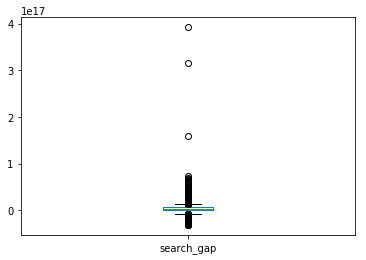

In [115]:
# Search_gap distribution before removing outliers
expedia.search_gap.astype(int).plot.box()

In [116]:
# Upper bound outside of which anything is an outlier
iqr(expedia.search_gap) + 1.5*(np.std(expedia.search_gap))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Timedelta('160 days 08:45:13.666610')

In [117]:
# no missing values
expedia.search_gap.isna().sum()

0

In [118]:
# Removes rows with negative stay_dur
expedia.search_gap = expedia.search_gap[expedia.search_gap.astype(int) >= 0] 

In [119]:
# removing outliers from search_gap
gap_dev = np.std(expedia.search_gap)
gap_iqr = iqr(expedia.search_gap) 
expedia = expedia[(expedia.search_gap < (gap_iqr + 1.5*gap_dev)) & (expedia.search_gap > (gap_iqr - 1.5*gap_dev))]

In [120]:
# Removes rows with negative stay_dur
expedia.stay_dur = expedia.stay_dur[expedia.stay_dur.astype(int) >= 0] 

In [121]:
# removing outliers from stay_dur
dur_dev = np.std(expedia.stay_dur)
dur_iqr = iqr(expedia.stay_dur) 
expedia = expedia[(expedia.stay_dur < (dur_iqr + 1.5*dur_dev)) & (expedia.stay_dur > (dur_iqr - 1.5*dur_dev))]

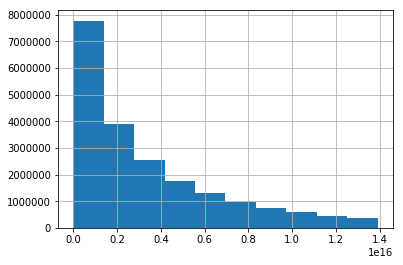

In [122]:
expedia.search_gap.astype(int).hist()

In [123]:
expedia.stay_dur.max()

Timedelta('7 days 00:00:00')

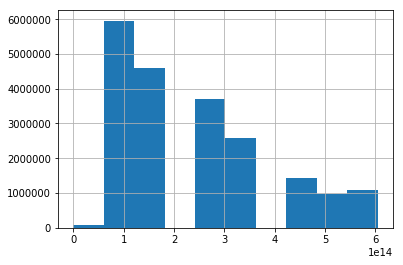

In [124]:
expedia.stay_dur.astype(int).hist()

In [126]:
expedia.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'search_gap'],
      dtype='object')

In [131]:
expedia.stay_dur.dtype

dtype('<m8[ns]')

In [132]:
expedia['stay_dur']  = expedia['stay_dur'].apply(lambda x: x.days)

pandas.core.series.Series

In [136]:
expedia['search_gap']  = expedia['search_gap'].apply(lambda x: x.days)

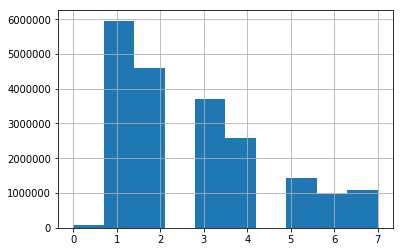

In [135]:
expedia.stay_dur.hist()

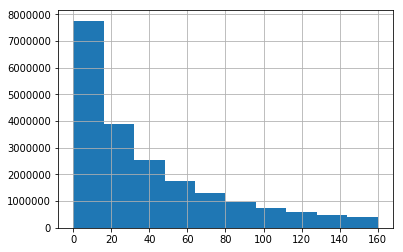

In [137]:
expedia.search_gap.hist()

In [138]:
expedia.dtypes

date_time                    datetime64[ns]
site_name                             int64
posa_continent                        int64
user_location_country                 int64
user_location_region                  int64
user_location_city                    int64
orig_destination_distance           float64
user_id                               int64
is_mobile                             int64
is_package                            int64
channel                               int64
srch_ci                      datetime64[ns]
srch_co                      datetime64[ns]
srch_adults_cnt                       int64
srch_children_cnt                     int64
srch_rm_cnt                           int64
srch_destination_id                   int64
srch_destination_type_id              int64
is_booking                            int64
cnt                                   int64
hotel_continent                       int64
hotel_country                         int64
hotel_market                    

In [139]:
expedia.drop(columns = ['date_time', 'srch_ci', 'srch_co', 'user_id'], inplace = True)

In [141]:
expedia.to_csv('expedia_proc.csv')